## 1. Importar librerías ##

In [1]:
# Clásicas de ciencia de datos 
import pandas as pd 
import numpy as np 

# Visualización 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.display import display, Markdown
pd.set_option('display.max_columns', None)

import importlib 
import A_Funciones as funciones # Este archivo contiene las funciones a utilizar
importlib.reload(funciones) # Actualiza los cambios en el archivo de las funciones


<module 'A_Funciones' from 'c:\\Users\\ESTEBAN\\Desktop\\Proyecto_Salud\\A_Funciones.py'>

## 2. Lectura de datos 

Los archivos csv son muy grandes. Para lograr cargar los datos de manera correcta, se utilizó Git LFS (Large File Storage), que es una extensión de Git que maneja archivos grandes de manera eficiente al almacenarlos fuera del repositorio principal y solo mantener referencias en el repositorio Git.

In [2]:
df_cronicos = pd.read_csv("data\\RETO_df_cronicos.csv", delimiter=';', encoding = 'latin1', low_memory=False) 
df_egresos = pd.read_csv("data\\RETO_df_egresos.csv")
df_usuarios = pd.read_csv('data\\RETO_df_usuarios.csv', low_memory=False)

# El parámetro latin1 se pone dado que hay ñ's y tildes en el archivo RETO_df_cronicos.csv que generan error en la lectura en Python 
# El parámetro low_memory = False permite una lectura más eficiente de los archivos al ser tan grandes 

# 3. Preprocesamiento # 

**Tabla de pacientes crónicos**

In [3]:
# Del archivo de funciones, nos traemos la funciones la función check_df
funciones.check_df(df_cronicos)

**Dimensiones base general**

(38717, 290)

**Primeros Registros**

,YEAR,MES,Fecha diligenciamiento,Hora,AtenciÃ³n,Ingreso,Tipo,NRODOC,Peso,Talla,IMC,ClasificaciÃ³n IMC,SaturaciÃ³n de OxÃ­geno (%),PerÃ­metro Muslo,PerÃ­metro Cintura,Pliegue Triceps,Pliegue Abdomen,Pliegue Muslo,Sumatoria Pliegues,PresiÃ³n Arterial SistÃ³lica,PresiÃ³n Arterial DiastÃ³lica,Frecuencia CardÃ­aca en reposo,Auto-calificacion Nivel de Ejercicio,Constantes,METS -Ãndice MetabÃ³lico,VO2 - MÃ¡xima Cantidad de OxÃ­geno,Ãndice de Fragilidad Groningen,CalificaciÃ³n (Ãndice de Fragilidad),Tiempo en Segundos (Apoyo Monopodal),CalificaciÃ³n (Apoyo Monopodal),Tiempo en Segundos (Recorrer 5 metros),Velocidad (m/s),CalificaciÃ³n Velocidad,Test Findrisc,Ãndice Tobillo/Brazo,Observaciones,PresiÃ³n arterial registro medico,Diabetes Mellitus,Tipo diabetes mellitus,Es insulinorequiriente,Tiempo con el diagnÃ³stico,Glicemia,Fecha glicemia,Hemoglobina Glicada,Fecha hemoglobina glicosilada,Control Diabetes,Tiene riesgo de tener Diabetes Mellitus,Tiene HTA,Control HTA,Tiene riesgo de tener HTA,Tiempo con el diagnÃ³stico1,Tiene EPOC,Espirometria,VEF1/CVF,VEF1/VFC Posbroncodilatador,Gravedad,DiagnÃ³stico EPOC,Disnea MMRC,ClasificaciÃ³n,CAT,NÃºmero de exacerbaciones Ãºltimo aÃ±o (Que hayan necesitado hospitalizado),ClasificaciÃ³n GOLD,ClasificaciÃ³n1,ClasificaciÃ³n BODEX,OxÃ­geno dependiente,Tiene gases arteriales,Resultado,EPOC (ClasificaciÃ³n BODEX),Enfermedad Coronaria (En el Ãºltimo aÃ±o),Insuficiencia CardÃ­aca,ValvulopatÃ­a,Arritmia o paciente con dispositivo,Sufre de alguna enfermedad cardiovascular,Â¿CuÃ¡l?,Tabaquismo,Cuantos cigarrillos dÃ­a,AÃ±os de Consumo,Indice paquete/aÃ±o,Lipoproteina,Fecha LDL,HDL,Fecha HDL,Colesterol total,Fecha colesterol total,Trigliceridos,Fecha trigliceridos,ClasificaciÃ³n de Framinghan,Creatinina 1 consulta,Fecha creatinina1,Tasa de FiltraciÃ³n Glomerular TFG,Estadio de la Enfermedad Renal,Microalbuminuria,Fecha microalbuminuria,Hormona Estimulante de la Tiroides (TSH),Otras Morbilidades,Clase Funcional,Creatinina 2 consulta,Fecha creatinina2,Tasa de FiltraciÃ³n Glomerular TFG2,Meses de diferencia entre TFG,Cambio de TFG,ClasificaciÃ³n Cambio de TFG,Ãltima mamografÃ­a,Ãltima citologÃ­a,Ãltima cita odontolÃ³gica,Ãltima cita con OptometrÃ­a / OftallmologÃ­a,Ãltimo PSA,Basciloscopia,Fecha basciloscopia,Ãltima vacuna de influenza,Fecha Vacuna Neumococo,Fecha vacuna neumococo veintitrÃ©s valentes,Ãlcera de pie diabÃ©tico,RemisiÃ³n,DiagnÃ³stico Principal,AnÃ¡lisis y conducta a seguir,Tiene prÃ³ximo control,Fecha PrÃ³ximo Control,Tipo control,Requiere cita de morbilidad,Fecha cita morbilidad,Ambito segÃºn el mÃ©dico,Diagnostico1,NombreDiagnostico1,Diagnostico2,NombreDiagnostico2,Diagnostico3,NombreDiagnostico3,Diagnostico4,NombreDiagnostico4,Diagnostico5,NombreDiagnostico5,Diagnostico6,NombreDiagnostico6,Diagnostico7,NombreDiagnostico7,Diagnostico8,NombreDiagnostico8,Diagnostico9,NombreDiagnostico9,Diagnostico10,NombreDiagnostico10,Diagnostico11,NombreDiagnostico11,Diagnostico12,NombreDiagnostico12,Diagnostico13,NombreDiagnostico13,Diagnostico14,NombreDiagnostico14,Diagnostico15,NombreDiagnostico15,Diagnostico16,NombreDiagnostico16,Diagnostico17,NombreDiagnostico17,Diagnostico18,NombreDiagnostico18,Diagnostico19,NombreDiagnostico19,Diagnostico20,NombreDiagnostico20,Diagnostico21,NombreDiagnostico21,Diagnostico22,NombreDiagnostico22,Diagnostico23,NombreDiagnostico23,Diagnostico24,NombreDiagnostico24,Diagnostico25,NombreDiagnostico25,Diagnostico26,NombreDiagnostico26,Diagnostico26.1,NombreDiagnostico26.1,Diagnostico27,NombreDiagnostico27,Diagnostico28,NombreDiagnostico28,Diagnostico29,NombreDiagnostico29,Diagnostico30,NombreDiagnostico30,Diagnostico31,NombreDiagnostico31,Diagnostico32,NombreDiagnostico32,Diagnostico33,NombreDiagnostico33,Diagnostico34,NombreDiagnostico34,Diagnostico35,NombreDiagnostico35,Diagnostico36,NombreDiagnostico36,Diagnostico37,NombreDiagnostico37,Diagnostico38,NombreDiagnostico38,Diagnostico39,NombreDiagnostico39,Diagnostico40,NombreDiagnostico40,Diagnostico41,NombreDiagnosti

**Número de duplicados**

2

Bajo una observación general de los datos, se nota que hay algunas columnas que tienen datos faltantes. Observemos mediante un gráfico de nulos, el comportamiento de los datos faltantes en el dataset. El gráfico se intepreta se la siguiente manera: mientras más oscuro sea el color de la columna, significa que más datos tienen, a medida que el color ses más claro, implica que dicha columna tiene más numeros de datos faltantes. 

C:\Users\ESTEBAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 141 (\x8d) missing from current font.
  func(*args, **kwargs)
C:\Users\ESTEBAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 154 (\x9a) missing from current font.
  func(*args, **kwargs)
C:\Users\ESTEBAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ESTEBAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 154 (\x9a) missing from current font.


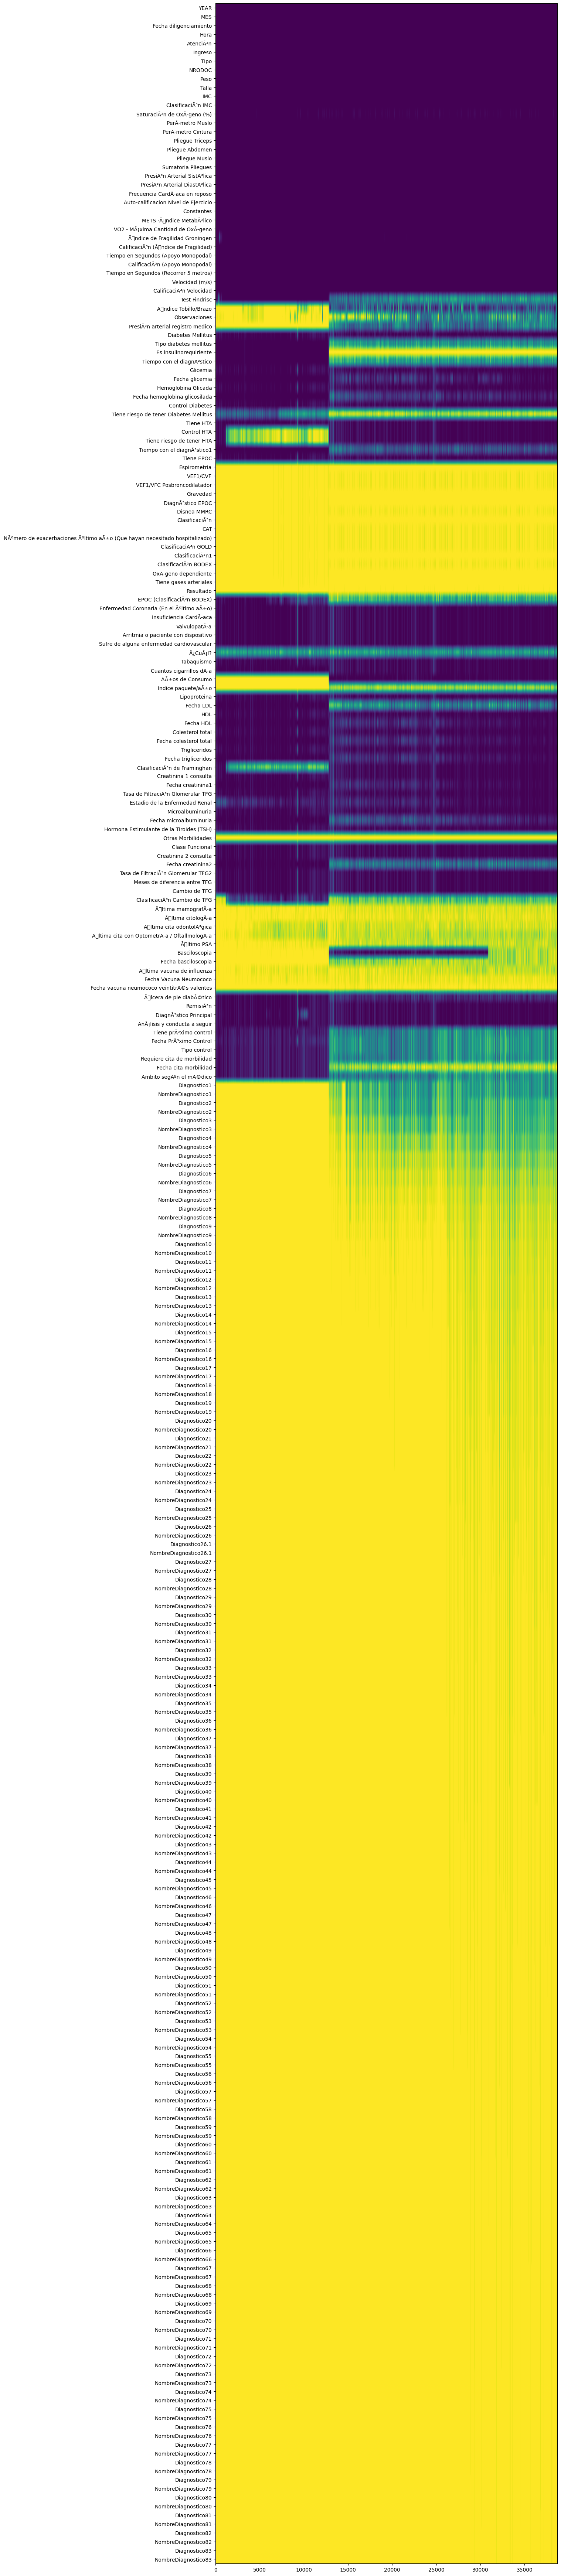

In [4]:
ax = plt.figure(figsize=(90,90)).add_subplot(111)
ax.imshow(df_cronicos.isna().values.T)
ax.set_aspect(1000)
plt.yticks(range(df_cronicos.shape[1]), df_cronicos.columns);

**Tabla de egresos**

In [5]:
funciones.check_df(df_egresos)

**Dimensiones base general**

(6376, 66)

**Primeros Registros**

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,EPS VALIDADA,MODALIDAD CONTRATO,FUENTE FINANCIACION1,FUENTE FINANCIACION2,SERVICIO ADMITE,BLOQUE ANTERIOR,PISO ANTERIOR,SERVICIO ANTERIOR,NRO CAMA ANTERIOR,VIA INGRESO,BLOQUE,UNIDAD ESTRATEGICA,PISO,NRO CAMA,SERVICIO EGRESO,TIPO EGRESO,FECHA INGRESO CLINICA,FECHA INGRESO SERVICIO,FECHA POSIBLE ALTA,FECHA ALTA MEDICA,FECHA RECAUDO,FECHA CAMILLERO,FECHA ENFERMERIA,FECHA FACTURACION AUDIFARMA,FECHA FARMACIA,FECHA SALIDA,FECHA ASEO,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,ALTA MEDICA,POSIBLE ALTA,DXPRINCIPAL EGRESO COD,DXPRINCIPAL EGRESO,DX RELACIONADO1 COD,DX RELACIONADO1,DX RELACIONADO2 COD,DX RELACIONADO2,DX RELACIONADO3 COD,DX RELACIONADO3,TIPO DIAGNOSTICO PRINCIPAL,PERTINENCIA DIAGNOSTICA,DX PRINCIPAL EGRESO CATEGORIA COD,DX PRINCIPAL EGRESO CATEGORIA,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE COD,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA COD,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO COD,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin información,NaN,Sin información,Sin información,Sin información,Urgencias Generales Sótano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin información,NaN,NaN,NaN,2017-05-17 09:03:57.637,NaN,NaN,NaN,NaN,NaN,2017-05-17 10:55:02.000,NaN,00:00,00:00,0.0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J984,OTROS TRASTORNOS DEL PULMON,J432,ENFISEMA CENTROLOBULAR,J981,COLAPSO PULMONAR,Sin Informacion,NaN,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
1,2017,DICIEMBRE,3720631,2018136,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin información,NaN,Sin información,Sin información,Sin información,Urgencias Generales Sótano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Sin informacion en Base de datos,Sin Informacion,Hospitalizacion Adultos,Sin Informacion,Sin Informacion,Sin Informacion,Sin información,NaN,NaN,NaN,2017-12-07 09:35:27.147,NaN,NaN,NaN,NaN,NaN,2017-12-07 11:06:49.000,NaN,00:00,00:00,0.0,NO,NO,Sin Informacion,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J960,INSUFICIENCIA RESPIRATORIA AGUDA,I110,ENFERMEDAD CARDIACA HIPERTENSIVA CON INSUFICIE...,I270,HIPERTENSION PULMONAR PRIMARIA,Sin Informacion,NaN,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna
2,2018,FEBRERO,3912821,2159592,501.0,Urgencias >= 24 horas,CC,308185,1937-07-18 00:00:00.000,Contributivo,NUEVA EPS S.A. PGP,PGP,NUEVA EPS,NUEVA EPS,Urgencias Generales Sótano,Sin Informacion,Sin Informacion,Sin Informacion,Sin Informacion,Urgencias,Bloque 3,Urgencias,Urgencias,FST101,Fast track 1,Alta Médica,2018-02-21 05:21:03.340,2018-02-21 05:21:03.340,NaN,2018-02-22 13:05:00.000,NaN,NaN,NaN,2018-02-22 14:30:20.003,NaN,2018-02-22 13:21:18.000,NaN,0:00,-27:20,0.0,NO,SI,SI,Sin Informacion,J441,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,J980,ENFERMEDADES DE LA TRAQUEA Y DE LOS BRONQUIOS ...,I10X,HIPERTENSION ESENCIAL (PRIMARIA),E872,ACIDOSIS,Repetido,p,J44,OTRAS ENFERMEDADES PULMONARES OBSTRUCTIVAS CRO...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos

**Número de duplicados**

173

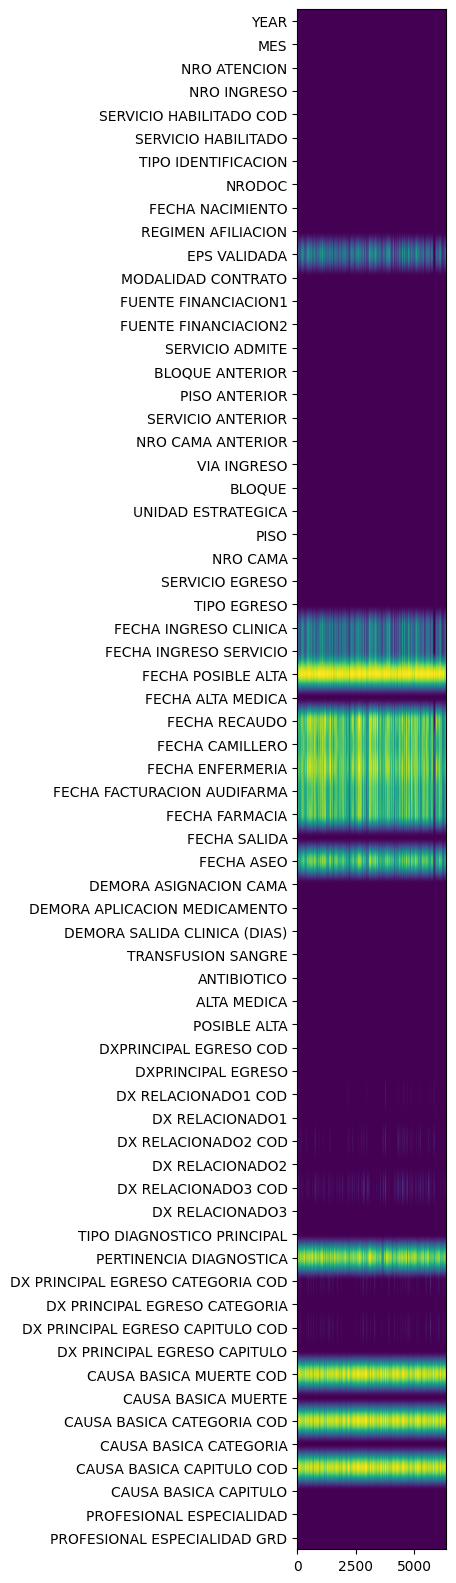

In [6]:
ax = plt.figure(figsize=(20,20)).add_subplot(111)
ax.imshow(df_egresos.isna().values.T)
ax.set_aspect(1000)
plt.yticks(range(df_egresos.shape[1]), df_egresos.columns);

**Tabla de usuarios**

In [7]:
funciones.check_df(df_usuarios)

**Dimensiones base general**

(183911, 16)

**Primeros Registros**

,MES,YEAR,NRODOC,SEXO,FECHA NACIMIENTO,EDAD,DEPARTAMENTO,MUNICIPIO,BARRIO,FECHA INICIO AL PGP,FECHA PRIMERA CLASE FUNCIONAL,PRIMERA CLASE FUNCIONAL,FECHA ÚLTIMA CLASE FUNCIONAL,ÚLTIMA CLASE FUNCIONAL,CICLO_VITAL,QUINQUENIO
0,ABRIL,2017,306221,F,1938-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABRIL,2017,306222,F,1974-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABRIL,2017,306223,F,1930-08-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABRIL,2017,306224,F,1979-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABRIL,2017,306225,M,1943-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Número de duplicados**

5012

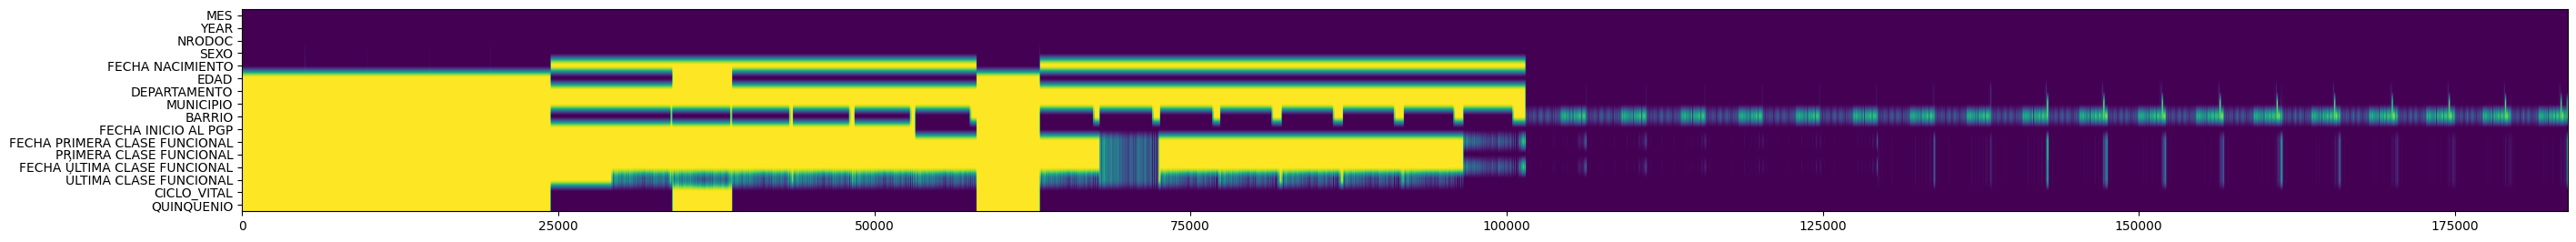

In [8]:
ax = plt.figure(figsize=(33,60)).add_subplot(111)
ax.imshow(df_usuarios.isna().values.T)
ax.set_aspect(1000)
plt.yticks(range(df_usuarios.shape[1]), df_usuarios.columns);

**Preprocesamiento 1**

In [9]:
# Eliminar duplicados para cada una de las tablas antes de unirlas 

df_egresos.drop_duplicates(inplace=True)
df_usuarios.drop_duplicates(inplace=True)
df_cronicos.drop_duplicates(inplace=True)

display(df_cronicos.shape)
display(df_egresos.shape)
display(df_usuarios.shape)


(38715, 290)

(6203, 66)

(178899, 16)

El primer preprocesamiento a realizar es reemplazar los registros que tengan los strings del tipo 'Sin información' o 'Sin información en base de datos' por un tipo de dato nulo. Esto es necesario para poder identificar verdaderamente cuántos nulos hay en la tabla, dado que 'Sin información' tecnicamente es un dato nulo para nuestro estudio. 

In [11]:
df_egresos.replace({'Sin Informacion': np.NaN, 'Sin información': np.NaN, 'Sin informacion en Base de datos': np.NaN, 'Sin informacion en base de datos': np.NaN}, inplace= True)
df_usuarios.replace({'Sin Informacion': np.NaN, 'Sin información': np.NaN, 'Sin informacion en Base de datos': np.NaN, 'Sin informacion en base de datos': np.NaN}, inplace = True )
df_cronicos.replace({'Sin Informacion': np.NaN, 'Sin información': np.NaN, 'Sin informacion en Base de datos': np.NaN, 'Sin informacion en base de datos': np.NaN}, inplace = True)


Se van a eliminar los registros que tengan más del 60% de nulos para las tres tablas. 

In [13]:
# Tabla egresos 
porcentajes_nulos_egresos = df_egresos.isnull().sum()*100/len(df_egresos)
eliminar_egresos = porcentajes_nulos_egresos[porcentajes_nulos_egresos> 20].keys()
eliminar_egresos.tolist()

df_egresos.drop(columns = eliminar_egresos, inplace= True)

# Tabla usuarios
porcentajes_nulos_usuarios = df_usuarios.isnull().sum()*100/len(df_usuarios)
eliminar_usuarios = porcentajes_nulos_usuarios[porcentajes_nulos_usuarios> 20].keys()
eliminar_usuarios.tolist()

df_usuarios.drop(columns= eliminar_usuarios, inplace = True)

# Tabla pacientes crónicos
porcentajes_nulos_cronicos = df_cronicos.isnull().sum()*100/len(df_cronicos)
eliminar_cronicos = porcentajes_nulos_cronicos[porcentajes_nulos_cronicos> 20].keys()
eliminar_cronicos.tolist()

df_cronicos.drop(columns=eliminar_cronicos, inplace = True)


In [14]:
display(Markdown('**Columnas a eliminar de la tabla de egresos**'))
display(eliminar_egresos)

display(Markdown('**Columnas a eliminar de la tabla de usuarios**'))
display(eliminar_usuarios)

display(Markdown('**Columnas a eliminar de la tabla de pacientes crónicos**'))
display(eliminar_cronicos)

**Columnas a eliminar de la tabla de egresos**

Index(['SERVICIO HABILITADO', 'REGIMEN AFILIACION', 'EPS VALIDADA',
       'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'BLOQUE ANTERIOR', 'PISO ANTERIOR', 'SERVICIO ANTERIOR',
       'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE', 'PISO', 'NRO CAMA',
       'SERVICIO EGRESO', 'TIPO EGRESO', 'FECHA INGRESO CLINICA',
       'FECHA INGRESO SERVICIO', 'PROFESIONAL ESPECIALIDAD'],
      dtype='object')

**Columnas a eliminar de la tabla de usuarios**

Index(['FECHA NACIMIENTO', 'BARRIO', 'FECHA INICIO AL PGP',
       'PRIMERA CLASE FUNCIONAL', 'ÚLTIMA CLASE FUNCIONAL'],
      dtype='object')

**Columnas a eliminar de la tabla de pacientes crónicos**

Index(['Test Findrisc', 'Ãndice Tobillo/Brazo',
       'PresiÃ³n arterial registro medico', 'Tipo diabetes mellitus',
       'Tiempo con el diagnÃ³stico', 'Control HTA',
       'Tiene riesgo de tener HTA', 'EPOC (ClasificaciÃ³n BODEX)', 'Â¿CuÃ¡l?',
       'AÃ±os de Consumo', 'Fecha LDL', 'ClasificaciÃ³n de Framinghan',
       'Fecha creatinina2', 'ClasificaciÃ³n Cambio de TFG', 'Basciloscopia',
       'Tiene prÃ³ximo control', 'Fecha PrÃ³ximo Control', 'Tipo control',
       'Requiere cita de morbilidad', 'Ambito segÃºn el mÃ©dico'],
      dtype='object')